In [1]:
#设置清华的pip镜像
!pip config set global.index-url https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple

Writing to C:\Users\WINDOWS\AppData\Roaming\pip\pip.ini


In [7]:
# fastai的依赖是pytorch2.5.1, 如果环境里没有默认会安装的是cpu版本
# 所以需要提前安装pytorch cuda版
# CUDA 12.4
!pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu124


Looking in indexes: https://download.pytorch.org/whl/cu124


In [1]:
# 安装fastbook
!pip install -U fastbook 

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple


In [6]:
import torch
#判断torch的版本
print(torch.__version__)
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))  # 输出：例如 "NVIDIA GeForce RTX 4070 Ti SUPER"

2.5.1+cu124
NVIDIA GeForce RTX 4070 Ti SUPER


In [11]:
import fastbook
# 如果在colab环境下，这里会mnt必要的磁盘
# 参考这里 https://github.com/fastai/course20/blob/master/fastbook/__init__.py
fastbook.setup_book()

In [14]:
# 如果在其他环境下 可能出现fastbook初始化不完全的情况
# 这时候可以直接自己实现 
# 参考 https://github.com/fastai/fastbook/blob/master/utils.py

In [15]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

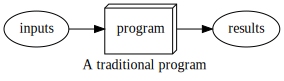

In [24]:
# 如果环境里没有装 记得安装conda install python-graphviz
gv('''
label=<A traditional program>
program[shape=box3d width=1 height=0.7]
inputs->program->results''')

In [19]:
from ipywidgets import widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [56]:
doc(learn.predict) # 查看文档

### 深度学习术语表（中英对照）

| 术语（Term）                | 含义（Meaning）                                                                                     |
|------------------------------|---------------------------------------------------------------------------------------------------|
| 标签（Label）                | 我们试图预测的数据，例如“狗”或“猫”                                                                  |
| 架构（Architecture）         | 模型的_模板_，即传递给输入数据和参数的实际数学函数                                                  |
| 模型（Model）                | 架构与特定参数集的组合                                                                              |
| 参数（Parameters）           | 模型中决定任务能力的数值，通过训练更新                                                              |
| 拟合（Fit）                  | 通过更新模型参数，使模型对输入数据的预测与目标标签匹配                                                |
| 训练（Train）                | "拟合"的同义词                                                                                      |
| 预训练模型（Pretrained model）| 已在大规模数据集上完成初步训练的模型，通常用于微调                                                    |
| 微调（Fine-tune）            | 为适应新任务对预训练模型进行的参数更新                                                                |
| 周期（Epoch）                | 对输入数据完成一次完整遍历的过程                                                                      |
| 损失函数（Loss）             | 通过随机梯度下降（SGD）驱动训练，衡量模型性能的指标                                                    |
| 评估指标（Metric）           | 在验证集上衡量模型表现的指标，用于人类可读的评估                                                      |
| 验证集（Validation set）     | 从训练数据中分离出的数据集，仅用于评估模型性能                                                        |
| 训练集（Training set）        | 用于模型拟合的数据集，不包含验证集数据                                                                |
| 过拟合（Overfitting）         | 模型过度记忆训练数据特征，而无法对未见数据保持良好泛化能力的训练现象                                    |
| 卷积神经网络（CNN，convolutional neural network）          | 专门用于计算机视觉任务的神经网络类型，具有局部连接和权值共享特性                                      |

## 基于ResNet34微调：猫狗图片分类器

In [37]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images' #第一次执行会下载

In [38]:
print(URLs.PETS)
print(path)

https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz
C:\Users\WINDOWS\.fastai\data\oxford-iiit-pet\images


In [39]:
# 根据数据集创建者提供的**文件名规则**给猫贴上标签
def is_cat(x): return x[0].isupper()

In [40]:
dls = ImageDataLoaders.from_name_func(
    path, 
    get_image_files(path), 
    valid_pct=0.2, # 保留20%的数据做验证集
    seed=42,
    label_func=is_cat, # 贴标签函数
    item_tfms=Resize(224) # Transform变换
)

In [41]:
learn = vision_learner(dls, # 图片数据加载器
                       resnet34, #第一次会去下载resnet34模型 https://download.pytorch.org/models/resnet34-b627a593.pth
                       metrics=error_rate # 将错误率作为评估指标
                      ) 
# 下载模型存在C:\Users\WINDOWS\.cache\torch\hub\checkpoints
learn.fine_tune(1) # 一次epoch

epoch,train_loss,valid_loss,error_rate,time
0,0.161843,0.021821,0.006089,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.052776,0.021442,0.008796,00:26


## 基于ResNet34微调：视频图片的语义分割

In [42]:
path = untar_data(URLs.CAMVID_TINY)
print(path)

C:\Users\WINDOWS\.fastai\data\camvid_tiny


In [43]:
# 假设输入图片path/image1.jpg，那么输出就是path/labels/image1_P.jpg,指向它的标签
def camvid_label_func(o): return path/'labels'/f'{o.stem}_P{o.suffix}'


In [44]:
camvid_codes = np.loadtxt(path/'codes.txt', dtype=str)
camvid_codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter',
       'OtherMoving', 'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone', 'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [45]:
dls = SegmentationDataLoaders.from_label_func(
    path, 
    bs=8, 
    fnames = get_image_files(path/"images"),
    label_func = camvid_label_func,
    codes = camvid_codes
)

In [48]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8) # 8次epoch

epoch,train_loss,valid_loss,time
0,3.310456,2.146809,00:00


epoch,train_loss,valid_loss,time
0,1.682692,1.394065,00:00
1,1.462968,1.222465,00:00
2,1.389476,1.212980,00:00
3,1.285601,1.096378,00:00
4,1.184639,0.973227,00:00
5,1.075613,0.912343,00:00
6,0.982315,0.883666,00:00
7,0.909537,0.871324,00:00


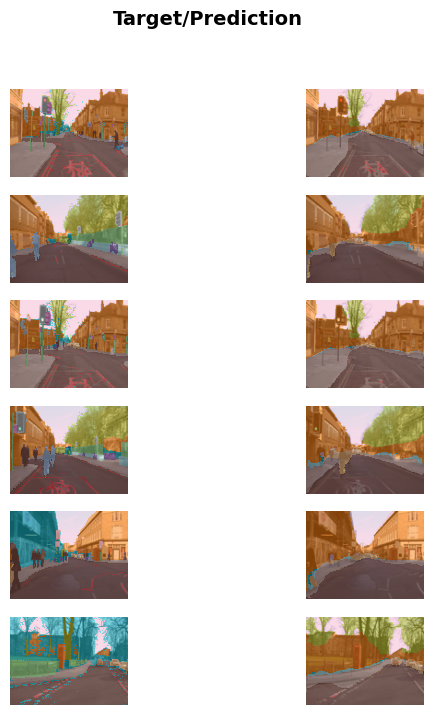

In [49]:
learn.show_results(max_n=6, figsize=(7,8))

## 基于AWD_LSTM微调：电影评论

In [50]:
from fastai.text.all import *

In [51]:
path = untar_data(URLs.IMDB)
print(path)

C:\Users\WINDOWS\.fastai\data\imdb


In [53]:
if __name__ == '__main__':
    print('Now in the main code. Process name is:', __name__)
    dls = TextDataLoaders.from_folder(path, 
                                      valid='test' # 指定验证集文件夹
                                     )
# windows上跑会得到这个 然后卡住
## Due to IPython and Windows limitation, python multiprocessing isn't available now.
## So `n_workers` has to be changed to 0 to avoid getting stuck

Now in the main code. Process name is: __main__


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\WINDOWS\\.fastai\\data\\imdb_tok\\counter.pkl'

In [ ]:
learn = text_classifier_learner(dls, 
                                AWD_LSTM, 
                                drop_mult=0.5, # 控制所有丢弃层（Dropout）的强度，0.5表示减少默认丢弃率的一半，防止过拟合
                                metrics=accuracy) # 评估指标=准确率


In [ ]:
learn.fine_tune(4, 1e-2) # 4个epoch，初始学习率为0.01

## 训练表格模型：薪酬预测

In [57]:
from fastai.tabular.all import *

In [58]:
path = untar_data(URLs.ADULT_SAMPLE)
print(path)

C:\Users\WINDOWS\.fastai\data\adult_sample


In [59]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', 
                                  path=path, 
                                  y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

D:\anaconda3\envs\fastaienv\Lib\site-packages\fastai\tabular\core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [60]:
learn = tabular_learner(dls, metrics=accuracy)

In [61]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.384470,0.353387,0.842291,00:02
1,0.361325,0.346031,0.841830,00:02
2,0.346159,0.344634,0.842291,00:02


In [63]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,8.0,11.0,3.0,11.0,2.0,2.0,1.0,1.274325,-1.282711,2.319401,0.0,1.0
1,5.0,13.0,5.0,11.0,2.0,5.0,1.0,-0.779774,0.810318,1.535697,0.0,0.0
2,5.0,9.0,3.0,9.0,1.0,5.0,1.0,-0.779774,3.755034,0.360142,1.0,0.0
3,5.0,12.0,1.0,9.0,5.0,3.0,1.0,0.247276,1.607937,-0.423562,0.0,0.0
4,1.0,6.0,7.0,1.0,3.0,5.0,1.0,2.374735,0.042915,-2.382821,0.0,0.0
5,5.0,3.0,5.0,9.0,4.0,5.0,1.0,-1.586741,-0.912617,-0.815414,0.0,0.0
6,5.0,10.0,5.0,13.0,4.0,5.0,1.0,-0.853134,-0.185437,1.143845,0.0,0.0
7,5.0,16.0,3.0,2.0,1.0,5.0,1.0,0.760800,-1.572177,-0.031710,0.0,0.0
8,5.0,13.0,3.0,6.0,2.0,5.0,1.0,-0.999856,2.044159,1.535697,1.0,0.0


## 协同过滤模型训练：观影预测

In [64]:
from fastai.collab import *

In [65]:
path = untar_data(URLs.ML_SAMPLE)
print(path)

C:\Users\WINDOWS\.fastai\data\movie_lens_sample


In [66]:
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.527814,1.448316,00:00


epoch,train_loss,valid_loss,time
0,1.381657,1.394480,00:00
1,1.291132,1.236531,00:00
2,1.038736,0.934970,00:00
3,0.811100,0.761836,00:00
4,0.688156,0.722149,00:00
5,0.624972,0.706537,00:00
6,0.618912,0.695376,00:00
7,0.626027,0.692373,00:00
8,0.609581,0.691179,00:00
9,0.606356,0.690967,00:00


In [67]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,36.0,77.0,4.5,4.450449
1,25.0,47.0,5.0,3.649423
2,95.0,57.0,5.0,4.257477
3,85.0,39.0,4.5,4.404735
4,28.0,66.0,3.0,3.144362
5,47.0,97.0,4.0,4.295034
6,36.0,84.0,2.5,4.076246
7,13.0,31.0,4.0,3.882764
8,8.0,35.0,3.0,4.210428
